# **HR Data to find out attrition rate and possibilities** 


Intepreting the organisation data to find the trends so that the HR department can take the appropriate steps to keep the organisation running and predict potential attrition cases.

Which factors (age, job role, overtime, salary, etc.) are most strongly associated with employee attrition? <br>
Is attrition higher among certain age groups or marital status categories?<br><br>
Bar charts (attrition by category), boxplots (income vs attrition), histograms (age distribution).<br>
Does overtime contribute to attrition risk?<br>



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filepath = '/kaggle/input/hr-analytics-prediction/HR-Employee-Attrition.csv'
data = pd.read_csv(filepath)

**Looking at first five rows**

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Shapes and Columns**

In [4]:
data.shape

(1470, 35)

In [5]:
list(data.columns)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [6]:
pd.DataFrame(data.dtypes, columns=['Data Types'])

,Data Types
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


|    |                   Column | Data Type | Unique Values |                                          Examples |
|---:|-------------------------:|----------:|--------------:|--------------------------------------------------:|
|  0 | Age                      | int64     | 43            | [41, 49, 37, 33, 27]                              |
|  1 | Attrition                | object    | 2             | [Yes, No]                                         |
|  2 | BusinessTravel           | object    | 3             | [Travel_Rarely, Travel_Frequently, Non-Travel]    |
|  3 | DailyRate                | int64     | 886           | [1102, 279, 1373, 1392, 591]                      |
|  4 | Department               | object    | 3             | [Sales, Research & Development, Human Resources]  |
|  5 | DistanceFromHome         | int64     | 29            | [1, 8, 2, 3, 24]                                  |
|  6 | Education                | int64     | 5             | [2, 1, 4, 3, 5]                                   |
|  7 | EducationField           | object    | 6             | [Life Sciences, Other, Medical, Marketing, Tec... |
|  8 | EmployeeCount            | int64     | 1             | [1]                                               |
|  9 | EmployeeNumber           | int64     | 1470          | [1, 2, 4, 5, 7]                                   |
| 10 | EnvironmentSatisfaction  | int64     | 4             | [2, 3, 4, 1]                                      |
| 11 | Gender                   | object    | 2             | [Female, Male]                                    |
| 12 | HourlyRate               | int64     | 71            | [94, 61, 92, 56, 40]                              |
| 13 | JobInvolvement           | int64     | 4             | [3, 2, 4, 1]                                      |
| 14 | JobLevel                 | int64     | 5             | [2, 1, 3, 4, 5]                                   |
| 15 | JobRole                  | object    | 9             | [Sales Executive, Research Scientist, Laborato... |
| 16 | JobSatisfaction          | int64     | 4             | [4, 2, 3, 1]                                      |
| 17 | MaritalStatus            | object    | 3             | [Single, Married, Divorced]                       |
| 18 | MonthlyIncome            | int64     | 1349          | [5993, 5130, 2090, 2909, 3468]                    |
| 19 | MonthlyRate              | int64     | 1427          | [19479, 24907, 2396, 23159, 16632]                |
| 20 | NumCompaniesWorked       | int64     | 10            | [8, 1, 6, 9, 0]                                   |
| 21 | Over18                   | object    | 1             | [Y]                                               |
| 22 | OverTime                 | object    | 2             | [Yes, No]                                         |
| 23 | PercentSalaryHike        | int64     | 15            | [11, 23, 15, 12, 13]                              |
| 24 | PerformanceRating        | int64     | 2             | [3, 4]                                            |
| 25 | RelationshipSatisfaction | int64     | 4             | [1, 4, 2, 3]                                      |
| 26 | StandardHours            | int64     | 1             | [80]                                              |
| 27 | StockOptionLevel         | int64     | 4             | [0, 1, 3, 2]                                      |
| 28 | TotalWorkingYears        | int64     | 40            | [8, 10, 7, 6, 12]                                 |
| 29 | TrainingTimesLastYear    | int64     | 7             | [0, 3, 2, 5, 1]                                   |
| 30 | WorkLifeBalance          | int64     | 4             | [1, 3, 2, 4]                                      |
| 31 | YearsAtCompany           | int64     | 37            | [6, 10, 0, 8, 2]                                  |
| 32 | YearsInCurrentRole       | int64     | 19            | [4, 7, 0, 2, 5]                                   |
| 33 | YearsSinceLastPromotion  | int64     | 16            | [0, 1, 3, 2, 7]                                   |
| 34 | YearsWithCurrManager     | int64     | 18            | [5, 7, 0, 2, 6]                                   |

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
data.isnull().sum().sort_values(ascending=False)

Age                         0
StandardHours               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
MonthlyIncome               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
MonthlyRate                 0
MaritalStatus               0
Attrition                   0
EmployeeCount               0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
JobSatisfaction             0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole   

The dataset is very clean with no missing values detected across columns. No imputation or removal is required for missingness.

In [10]:
# Convert Attrition and OverTime to True/False
data['Attrition'] = data['Attrition'].map({'Yes': True, 'No': False})
data['OverTime']  = data['OverTime'].map({'Yes': True, 'No': False})

# Drop columns
columns_to_drop = [
    'Over18', 'StandardHours', 'EmployeeCount', 'EmployeeNumber',
    'JobInvolvement', 'TrainingTimesLastYear', 'YearsWithCurrManager',
    'RelationshipSatisfaction', 'StockOptionLevel', 'NumCompaniesWorked',
    'MonthlyRate', 'HourlyRate', 'BusinessTravel', 'DailyRate', 'EducationField'
]

data.drop(columns=columns_to_drop, inplace=True)
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,True,Sales,1,2,2,Female,2,Sales Executive,4,Single,5993,True,11,3,8,1,6,4,0
1,49,False,Research & Development,8,1,3,Male,2,Research Scientist,2,Married,5130,False,23,4,10,3,10,7,1
2,37,True,Research & Development,2,2,4,Male,1,Laboratory Technician,3,Single,2090,True,15,3,7,3,0,0,0
3,33,False,Research & Development,3,4,4,Female,1,Research Scientist,3,Married,2909,True,11,3,8,3,8,7,3
4,27,False,Research & Development,2,1,1,Male,1,Laboratory Technician,2,Married,3468,False,12,3,6,3,2,2,2


In [11]:
#checking remaining columns
list(data.columns)

['Age',
 'Attrition',
 'Department',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'Gender',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'TotalWorkingYears',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion']

# Demographic of the Attrition

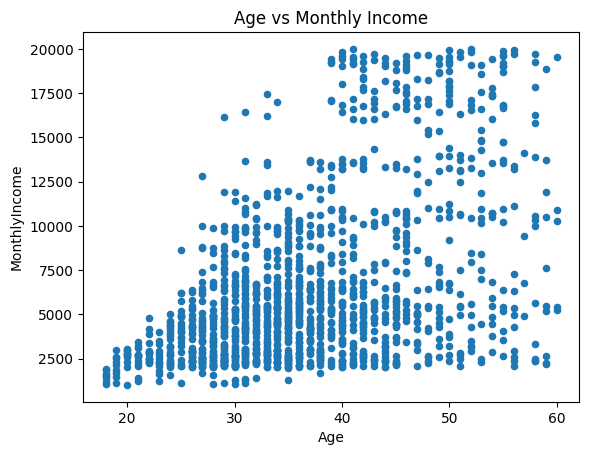

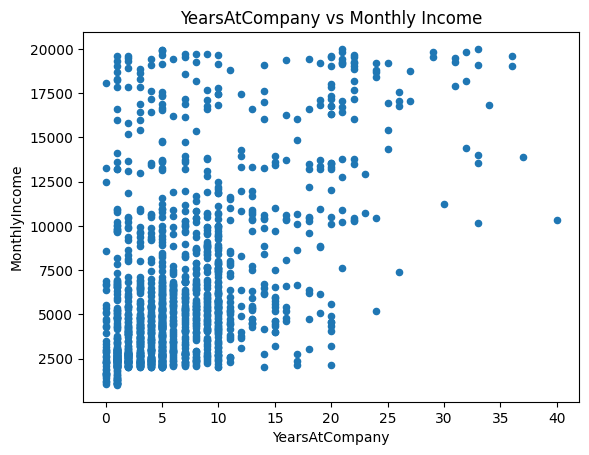

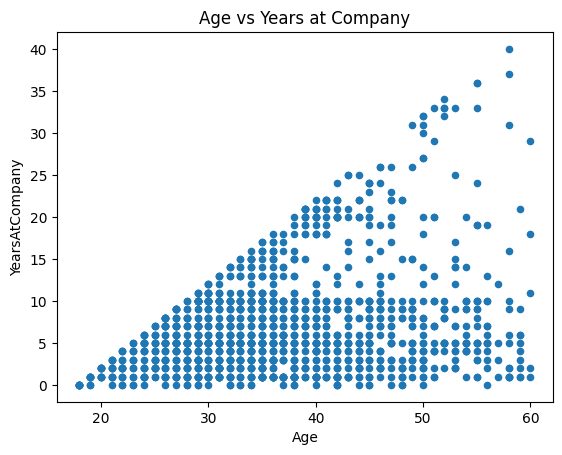

In [12]:
# Make a numeric  for attrition
data['AttritionFlag'] = data['Attrition'].map({True: 1, False: 0})

data.plot(kind='scatter', x='Age', y='MonthlyIncome')
plt.title('Age vs Monthly Income')
plt.show()

#older employees earn more

data.plot(kind='scatter', x='YearsAtCompany', y='MonthlyIncome')
plt.title('YearsAtCompany vs Monthly Income')
plt.show()

#pay raises with tenure

data.plot(kind='scatter', x='Age', y='YearsAtCompany')
plt.title('Age vs Years at Company')
plt.show()

Age - Are younger or older employees leaving more? <br>
Gender - Is there a difference in attrition rates between Male/Female?<br>
MaritalStatus - Which group leaves more? <br>
Dapartment - which department has the highest attrition?

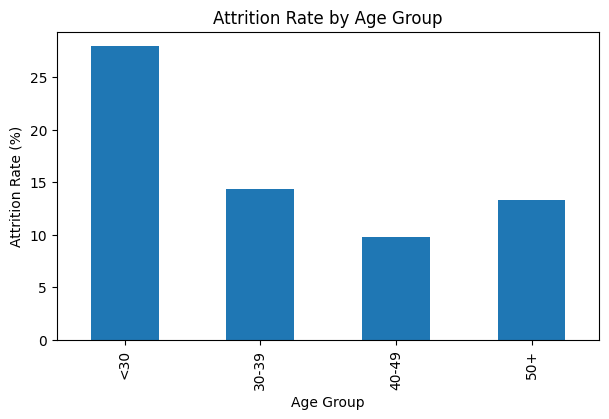

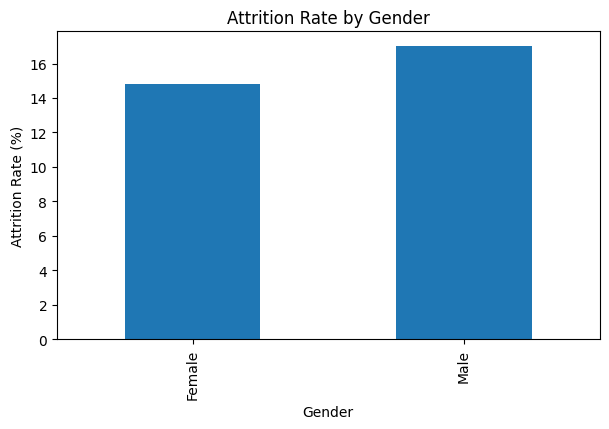

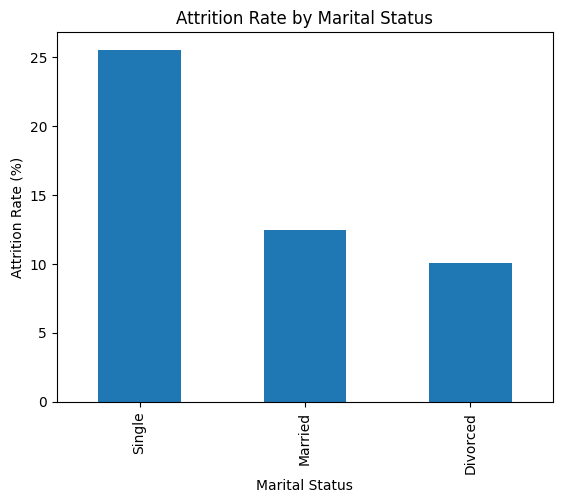

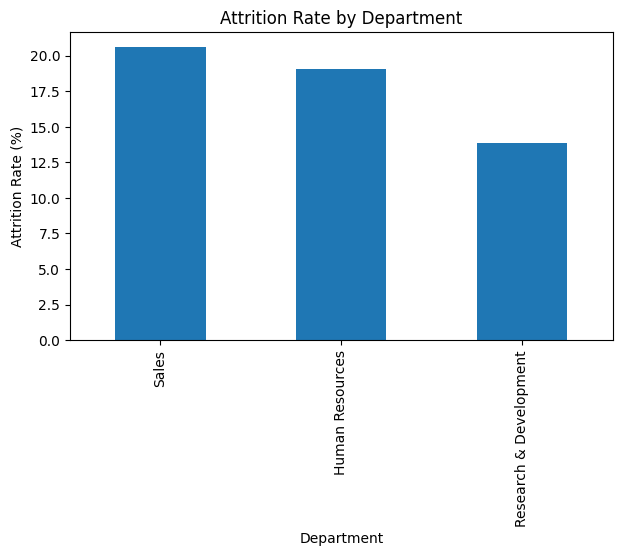

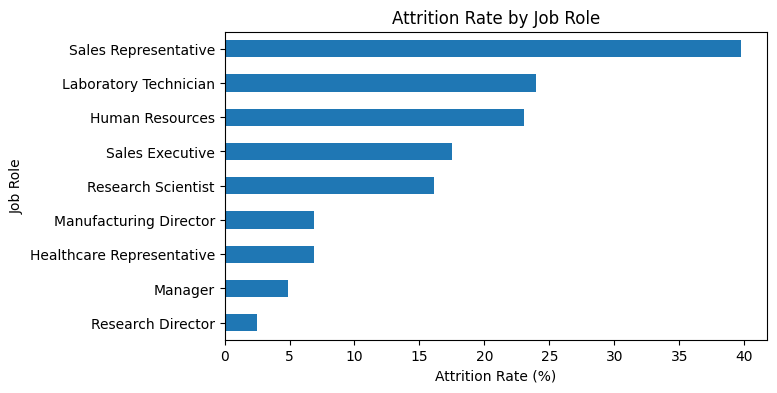

In [13]:
# 4 age groups
def age_band(a):
    if a < 30:   return '<30'
    elif a < 40: return '30-39'
    elif a < 50: return '40-49'
    else:        return '50+'

order = ['<30','30-39','40-49','50+']
age_rate = (data.groupby(data['Age'].apply(age_band))['Attrition'].mean() * 100).reindex(order)

age_rate.plot(kind='bar', title='Attrition Rate by Age Group', figsize=(7,4))
plt.xlabel('Age Group'); plt.ylabel('Attrition Rate (%)')
plt.show()

# Gender
gender_rate = data.groupby('Gender')['Attrition'].mean() * 100

gender_rate.plot(kind='bar', figsize=(7,4))
plt.title('Attrition Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Attrition Rate (%)')
plt.show()

# Marital status
ms_rate = data.groupby('MaritalStatus')['Attrition'].mean().sort_values(ascending=False) * 100

ms_rate.plot(kind='bar')
plt.title('Attrition Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Attrition Rate (%)')
plt.show()

# Department: Attrition RATE (%)
dept_rate = (data.groupby('Department')['Attrition'].mean() * 100).sort_values(ascending=False)
dept_rate.plot(kind='bar', figsize=(7,4), title='Attrition Rate by Department')
plt.xlabel('Department'); plt.ylabel('Attrition Rate (%)')
plt.show()

# JobRole: Attrition RATE (%)
job_rate = (data.groupby('JobRole')['Attrition'].mean() * 100).sort_values(ascending=True)
job_rate.plot(kind='barh', figsize=(7,4), title='Attrition Rate by Job Role')
plt.xlabel('Attrition Rate (%)'); plt.ylabel('Job Role')
plt.show()


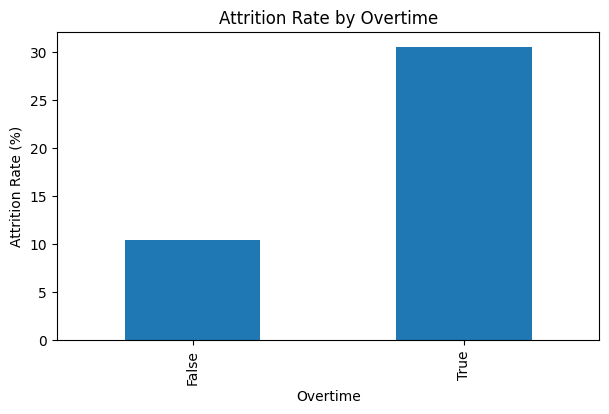

In [14]:
ot_rate = (data.groupby('OverTime')['Attrition'].mean() * 100).reindex([False, True]).fillna(0)

ot_rate.plot(kind='bar', title='Attrition Rate by Overtime', figsize=(7,4))
plt.xlabel('Overtime')
plt.ylabel('Attrition Rate (%)')
plt.show()

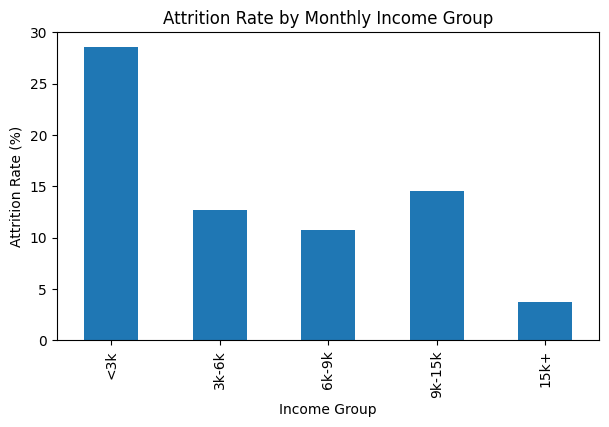

In [15]:
def income_band(v):
    if v < 3000:   return '<3k'
    elif v < 6000: return '3k-6k'
    elif v < 9000: return '6k-9k'
    elif v < 15000:return '9k-15k'
    else:          return '15k+'

data['IncomeGroup'] = data['MonthlyIncome'].apply(income_band)

order = ['<3k','3k-6k','6k-9k','9k-15k','15k+']
inc_rate = (data.groupby('IncomeGroup')['Attrition'].mean() * 100).reindex(order).fillna(0)

inc_rate.plot(kind='bar', title='Attrition Rate by Monthly Income Group', figsize=(7,4))
plt.xlabel('Income Group')
plt.ylabel('Attrition Rate (%)')
plt.show()

AI prompt: Hoow to best present a plot that co relates to attrrtion with two other factors (e.g., Age vs Income)

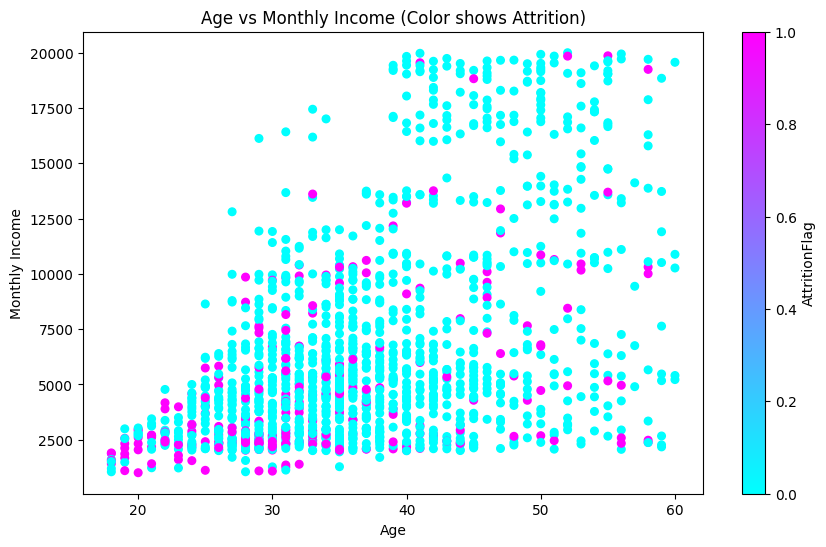

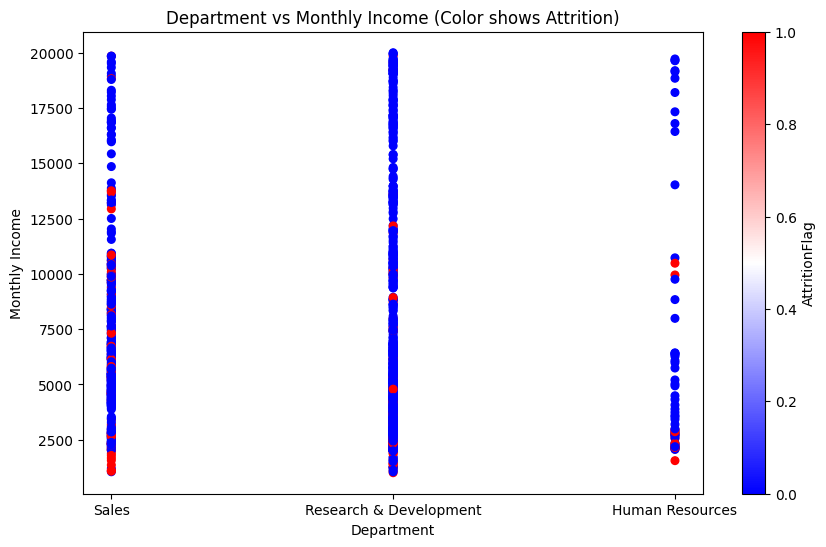

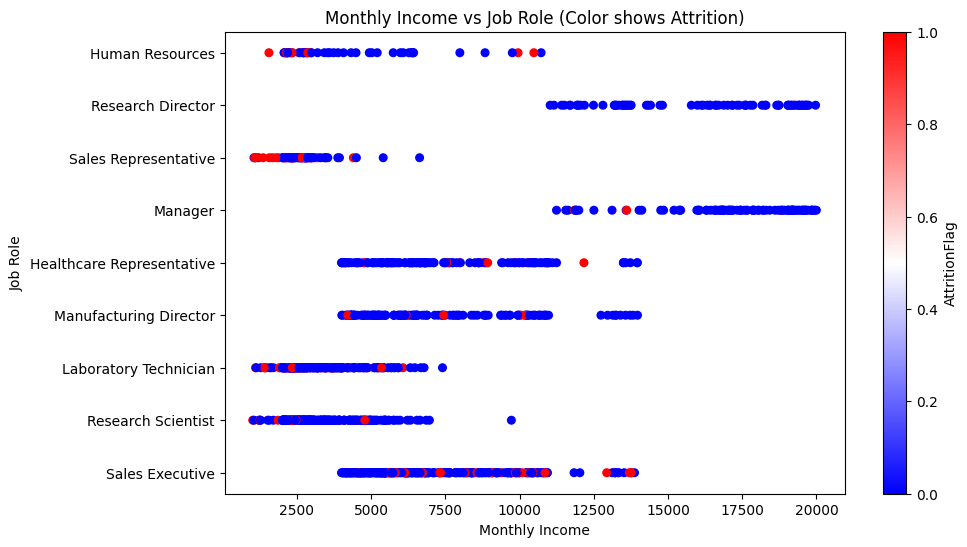

In [16]:
data['AttritionFlag'] = data['Attrition'].map({True: 1, False: 0})

# Age vs Monthly Income
data.plot(
    kind='scatter',
    x='Age',
    y='MonthlyIncome',
    c='AttritionFlag',
    colormap='cool',
    figsize=(10,6),
    s=30
)
plt.title('Age vs Monthly Income (Color shows Attrition)')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()

# Department vs Monthly Income
data.plot(
    kind='scatter',
    x='Department',
    y='MonthlyIncome',
    c='AttritionFlag',
    colormap='bwr',
    figsize=(10,6),
    s=30
)
plt.title('Department vs Monthly Income (Color shows Attrition)')
plt.xlabel('Department')
plt.ylabel('Monthly Income')
plt.show()

# Department vs Monthly Income
data.plot(
    kind='scatter',
    x='MonthlyIncome',
    y='JobRole',
    c='AttritionFlag',
    colormap='bwr',
    figsize=(10,6),
    s=30
)
plt.title('Monthly Income vs Job Role (Color shows Attrition)')
plt.xlabel('Monthly Income')
plt.ylabel('Job Role')
plt.show()

Overtime = Burnout = Leaving<br>
Low Pay = Higher attrition risk<br>
Certain Departments = More turnover than others

Based on our analysis of the HR Employee Attrition dataset, several clear patterns emerge:

Overtime (Work-Life Balance)

Employees who work overtime are significantly more likely to leave.

This suggests that heavy workload and poor work-life balance are major drivers of attrition.

Monthly Income (Compensation)

Attrition is highest among employees earning below 6k/month, and steadily declines as salaries rise.

Compensation appears to be a strong motivator for retention — employees are more likely to stay when they feel fairly paid.

Department Differences

Attrition rates vary across departments. For example, Sales has a higher attrition rate compared to R&D and HR.

This points to department-specific factors such as job stress, career development opportunities, or management style.